In [27]:
#loading in cases by state/county covid data
library('tidyr')
library('ggplot2')
suppressMessages(library('dplyr'))
cases <- read.csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv",check.names=F)
deaths <- read.csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv",check.names=F)

deathsonly <- select(deaths, 7, 13:dim(cases)[2])
casesonly <- select(cases, 7, 12:dim(cases)[2])
summedcases <- casesonly %>% group_by(Province_State) %>% summarise_all(sum) 
summeddeaths <- deathsonly %>% group_by(Province_State) %>% summarise_all(sum) 

In [28]:
stateBarCases <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    ggplot(data=temp,aes(x=day, y=NewCases)) +
    geom_bar(stat="identity",fill='black',colour='black') 
}

stateBarDeaths <- function(state) {
    temp <- filter(summeddeaths, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewDeaths = 0L)
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    ggplot(data=temp,aes(x=day, y=NewDeaths)) +
    geom_bar(stat="identity",fill='black',colour='black') 
}

In [29]:
stateLineCases <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, threeDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 3) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3])/3
            } 
        }
    ggplot(data=temp, aes(x=day, y=threeDay))+
    geom_smooth(size = 1.5, color="red", span = .2, method = 'loess') 
}

stateLineDeaths <- function(state) {
    temp <- filter(summeddeaths, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewDeaths = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, threeDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 3) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3])/3
            } 
        }
    ggplot(data=temp, aes(x=day, y=threeDay))+
    geom_smooth(size = 1.5, color="red", span = .2, method = 'loess') 
}

In [37]:
stateBothCases <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, sevenDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 7) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3]+temp[i-3,3]+temp[i-4,3]+temp[i-5,3]+temp[i-6,3])/7
            } 
        }
    ggplot(temp, aes(x = day)) + 
    geom_col(aes(y = NewCases), size = 1, color = "black", fill = "black") +
    geom_smooth(aes(y = sevenDay), size = 1.5, color="red", span = .1, method = 'loess') 
}

stateBothDeaths <- function(state) {
    temp <- filter(summeddeaths, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewDeaths = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, sevenDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 7) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3]+temp[i-3,3]+temp[i-4,3]+temp[i-5,3]+temp[i-6,3])/7
            } 
        }
    ggplot(temp, aes(x = day)) + 
    geom_col(aes(y = NewDeaths), size = 1, color = "black", fill = "black") +
    geom_smooth(aes(y = sevenDay), size = 1.5, color="red", span = .1, method = 'loess') 
}

In [ ]:
stateLineCases('Missouri')

In [ ]:
stateBarCases('Missouri')

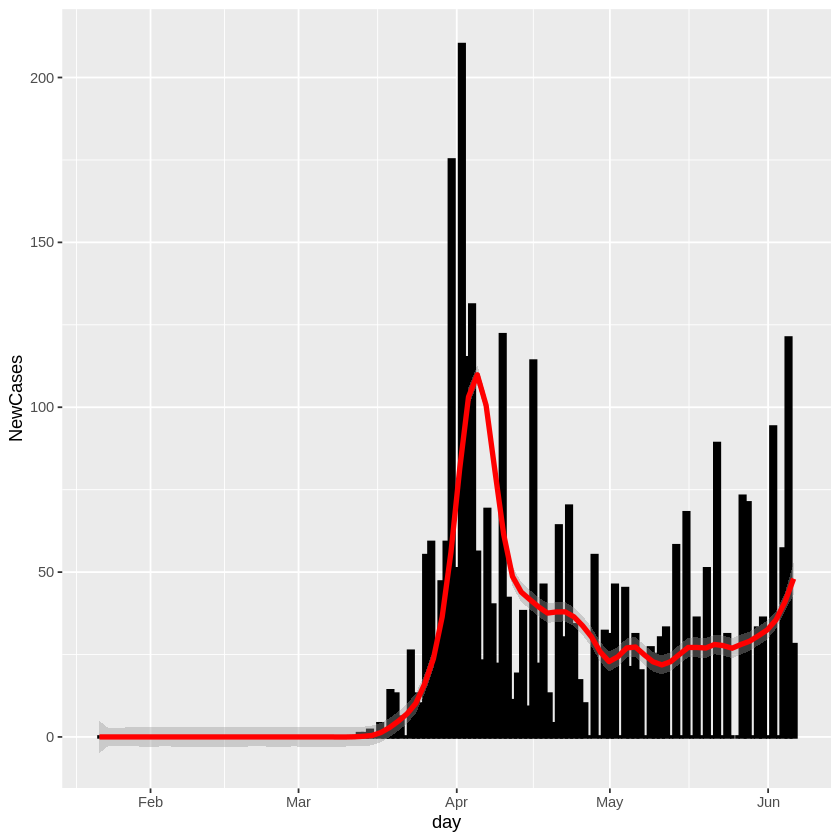

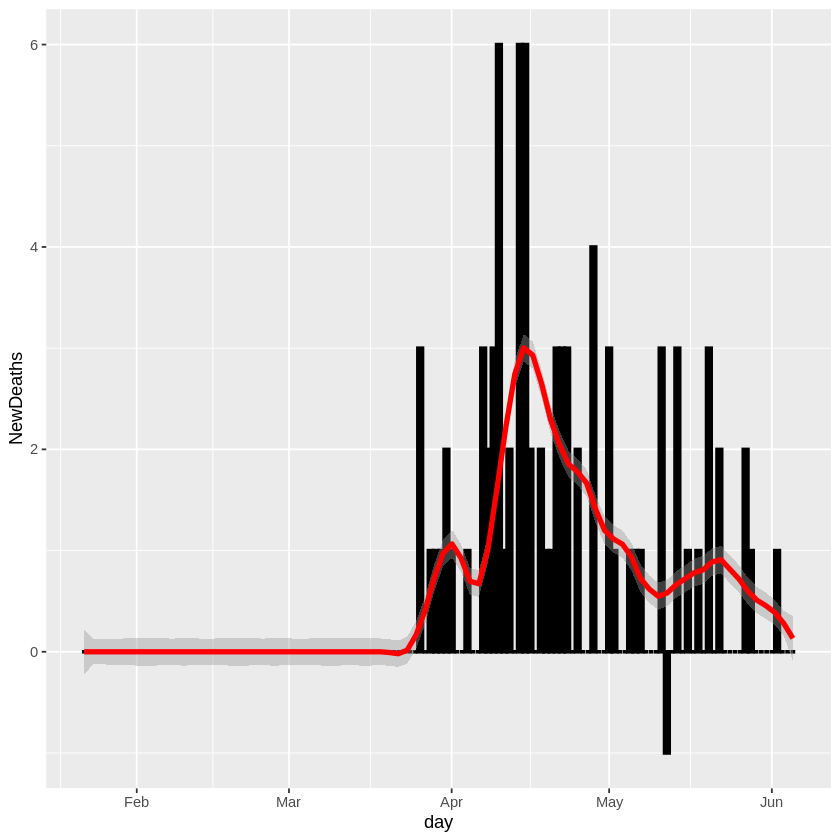

In [51]:
stateBothCases('Idaho')
stateBothDeaths('Idaho')